# Mira Saldanha and Priyal Patel - Swamphacks VIII :)

In [156]:
import pandas as pd
import matplotlib.pyplot as plt
import json

In [157]:
def Default():
    #default will show temps in Gnv, 2020, before  prompting for input
    data2020 = info[info["YEAR"] == 2020]
    
    daysList = range(len(data2020))
    meansList = data2020['meanTemp']

    plt.plot(daysList,meansList)
    plt.title('Mean Temepratures in Gainesville, FL, in 2020')
    plt.xlabel('Day of 2020')
    plt.ylabel('Mean Temp in Fahrenheit')
    plt.show()
    
def CityStr(cityNum):
    
    if cityNum == 1:
        cityAb = "tam"
        city = "Tampa"
    elif cityNum == 2:
        cityAb = "jax"
        city = "Jacksonville"
    elif cityNum == 3:
        cityAb = "mia"
        city = "Miami"
    elif cityNum == 4:
        cityAb = "orl"
        city = "Orlando"
    elif cityNum == 5:
        cityAb = "gnv"
        city = "Gainesville"

    return cityAb+"_weather.json", city
    
def YearValid(year):
    data = info[info["YEAR"] == year]
    if data.empty:
        return False
    else:
        return True
    
def YearSelection(year):
    data = info[info["YEAR"] == year]
    daysList = range(len(data))
    meansList = data['meanTemp']
    return data, daysList, meansList
    
    
def MonthConverter(month):
    if month == 1:
        return "January"
    elif month == 2:
        return "February"
    elif month == 3:
        return "March"
    elif month == 4:
        return "April"
    elif month == 5:
        return "May"
    elif month == 6:
        return "June"
    elif month == 7:
        return "July"
    elif month == 8:
        return "August"
    elif month == 9:
        return "September"
    elif month == 10:
        return "October"
    elif month == 11:
        return "November"
    elif month == 12:
        return "December"

def ShowYear(year, city):
    
    data, daysList, meansList = YearSelection(year)
    
    plt.plot(daysList,meansList)
    plt.title('Mean Temepratures in ' + city + ', FL, in ' + str(year))
    plt.xlabel('Day of ' + str(year))
    plt.ylabel('Mean Temp in Fahrenheit')
    plt.show()
    
def ShowHighLow(year, city):
    #potential improvment = find day or days, and say what they are
    data, daysList, meansList = YearSelection(year)
    
    max = meansList.max()
    min = meansList.min()
    print('The highest mean temperature in ' + city +' in ' + str(year) + ' was ' + str(max))
    print('The lowest mean temperature in ' + city + ' in ' + str(year) + ' was ' + str(min))
    
def MonthSelection(month, year): #month is number 1 to 12
    
    data, daysList, meansList = YearSelection(year)
    
    data = data[data["MONTH"] == month]
    daysList = range(len(data))
    meansList = data['meanTemp']
    
    return data, daysList, meansList

  
def ShowMonth(month, year, city):
    data, daysList, meansList = MonthSelection(month, year)
    
    plt.plot(daysList,meansList)
    plt.title('Mean Temperatures in ' + city + ', FL, in ' + MonthConverter(month) + ', ' + str(year))
    plt.xlabel('Day of ' + MonthConverter(month))
    plt.ylabel('Mean Temp in Fahrenheit')
    plt.show()
    
def MonthHighLow(month, year, city):
    data, daysList, meansList = MonthSelection(month, year)
    
    max = meansList.max()
    min = meansList.min()
    print('The highest mean temperature in ' + city + ' in ' + MonthConverter(month) + ', ' + str(year) + ' was ' + str(max))
    print('The lowest mean temperature in ' + city + ' in ' + MonthConverter(month) + ', ' + str(year) + ' was ' + str(min))
    


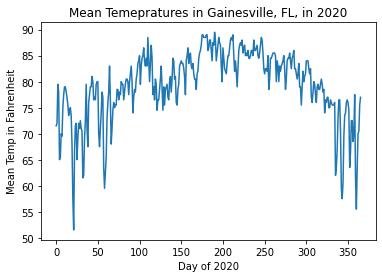

Welcome to weather records in fl !
Select a city by typing in a number:
 1. Tampa 
 2. Jacksonville 
 3. Miami 
 4. Orlando 
 5. Gainesville
2
Please enter a year from 1960 to 2020. To exit, enter. 2004
Enter a number to continue:
 1. Show mean temperatures for full year
 2. See high and low mean temperatures for this year
 3. See a specific month of this year
1


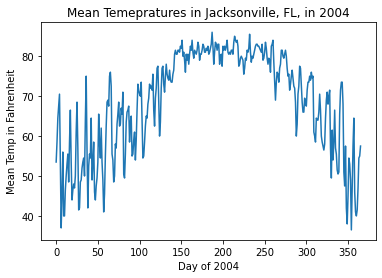

Please enter a year from 1960 to 2020. To exit, enter. 2005
Enter a number to continue:
 1. Show mean temperatures for full year
 2. See high and low mean temperatures for this year
 3. See a specific month of this year
2
The highest mean temperature in Jacksonville in 2005 was 87.0
The lowest mean temperature in Jacksonville in 2005 was 37.0
Please enter a year from 1960 to 2020. To exit, enter. 1998
Enter a number to continue:
 1. Show mean temperatures for full year
 2. See high and low mean temperatures for this year
 3. See a specific month of this year
3
Please enter the number of the month you wish to see (ex: March = 3)
5

Enter a number to continue:
 1. Show mean temperatures for full month
 2. See high and low mean temperatures for this month
1


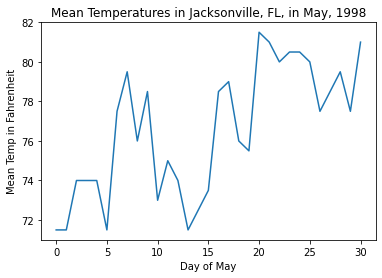

Please enter a year from 1960 to 2020. To exit, enter. 0
Please enter a valid year.


In [158]:
#user menu

Default()
year = 2020
print("Welcome to weather records in fl !")

try: 
    print("Select a city by typing in a number:")
    print(" 1. Tampa \n 2. Jacksonville \n 3. Miami \n 4. Orlando \n 5. Gainesville")
    city  = int(input())
    
    if city > 5 or city < 1:
        print("Invalid selection. Please try again.")
    
except ValueError:
    print("Please enter a number on the city menu.")

fileName, cityName = CityStr(city)
dataset = json.load(open(fileName))

info_keys = ['YEAR', 'MONTH', 'DAY', 'meanTemp']
info = pd.DataFrame(dataset, columns=info_keys) 
info = info[info['meanTemp'] != -99.9] #remove outliers

while year != 0:
    try:
        year = int(input("Please enter a year from 1960 to 2020. To exit, enter. ")) 
    except ValueError:
        print('Sorry. Invalid option number. Please try again.')
        continue
    
    if (year < 1960 or year > 2020):
            print('Please enter a valid year.')
            continue
        
    if year != 0:   
        if YearValid(year):
            #keep going, ask for what next
            print("Enter a number to continue:")
            print(" 1. Show mean temperatures for full year")
            print(" 2. See high and low mean temperatures for this year")
            print(" 3. See a specific month of this year")
           
            menu = int(input())
            if menu == 1:
                ShowYear(year, cityName)
            elif menu == 2:
                ShowHighLow(year, cityName)
            elif menu == 3:
                print("Please enter the number of the month you wish to see (ex: March = 3)")
                month = int(input())
                print()
                print("Enter a number to continue:")
                print(" 1. Show mean temperatures for full month")
                print(" 2. See high and low mean temperatures for this month")
              
                menu = int(input())
                if menu == 1:
                    ShowMonth(month, year, cityName)
                elif menu == 2:
                    MonthHighLow(month, year, cityName)
                else:
                    print("Invalid entry. Please try again.")
                
            else:
                print("Invalid entry. Please try again.")
            
        else:
            print("Not enough data for this year. Please try again") 
            print()
            continue